In [6]:
# Importing libraries
import numpy as np
import pandas as pd

# Read the Dataset

In [7]:
# read the dataset 
data_df= pd.read_csv("C:\\Users\\asheesh\\Documents\\menka\Data Scientist\\ML\\ASSISGNMENT\\EDA practise\\IceCreamData.csv")

#  EDA Step - Basic Info and Cleaning the Dataset

In [8]:
#  check the data read 
data_df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [9]:
# check the nos of columns and rows in the data
data_df.shape
#Inference: 500 rows and 2 columns

(500, 2)

In [10]:
# check the datatype and  missing values in the data
data_df.info()

# Inference : There are no missing values. Also we have no categorical values .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [10]:
# check for null values
data_df.isnull().sum()

#Inference : No null values

Temperature    0
Revenue        0
dtype: int64

In [11]:
# check the unique values
data_df.nunique()
# Inference : All are unique values

Temperature    500
Revenue        500
dtype: int64

In [12]:
# Check the statiscal values mean , min max 
data_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Check and Handle the  Outliers

<AxesSubplot:>

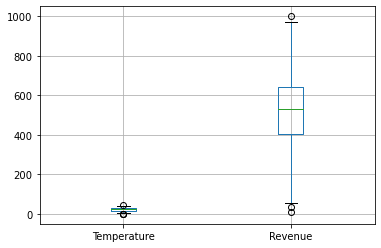

In [13]:
# check for outliers
data_df.boxplot()

#Inference : There are outliers

In [14]:
# treat the outliers for Temperature
q1_temp = data_df['Temperature'].describe()[4]
q3_temp = data_df['Temperature'].describe()[6]
IQR_temp = q3_temp - q1_temp
IQR_temp

10.618416620000001

In [15]:
# calculate upperwhisker
upperwhisker_temp = (q3_temp + (1.5*IQR_temp)).astype(int)
upperwhisker_temp


43

In [16]:
# calculate lowerwhisker
lowerwhisker_temp = (q1_temp - (1.5*IQR_temp)).astype(int)
lowerwhisker_temp

1

In [17]:
# identify all the outliers in temperature column
data_df[data_df['Temperature'] > upperwhisker_temp]['Temperature']

444    45.0
Name: Temperature, dtype: float64

In [18]:
out_temp = len (data_df[data_df['Temperature'] > upperwhisker_temp]['Temperature'])
out_temp

1

In [19]:
#If percent is more than 0.3% we need to handle the outlier
percent_temp = round((out_temp/data_df.shape[0])*100 , 2)
percent_temp
# Inference :  If percent is more than 0.3% we need to handle the outlier . In this case its 0.2 % so we can leave the outlier

0.2

In [20]:
data_df[data_df['Temperature'] < lowerwhisker_temp]['Temperature']

8      0.976870
371    0.267028
402    0.000000
Name: Temperature, dtype: float64

In [21]:
out_temp_l = len (data_df[data_df['Temperature'] < lowerwhisker_temp]['Temperature'])
out_temp_l

3

In [22]:
percent_temp_l = round((out_temp_l/data_df.shape[0])*100 , 2)
percent_temp_l
# Inference :  If percent is more than 0.3% we need to handle the outlier . In this case its 0.6 %

0.6

In [23]:
data_df['Temperature'] = np.where(data_df['Temperature'] < lowerwhisker_temp , lowerwhisker_temp , data_df['Temperature'] )

<AxesSubplot:>

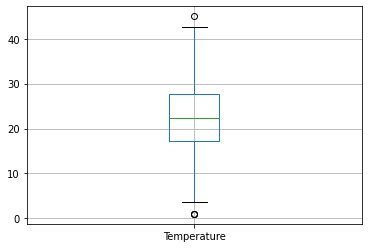

In [24]:
data_df.boxplot('Temperature')

In [25]:
# Checking if the outlier is  handled 
data_df[data_df['Temperature'] < lowerwhisker_temp]['Temperature']

Series([], Name: Temperature, dtype: float64)

In [26]:
data_df.iloc[8, :]

#Inference : The outlier is habndled 

Temperature     1.000000
Revenue        55.390338
Name: 8, dtype: float64

<AxesSubplot:>

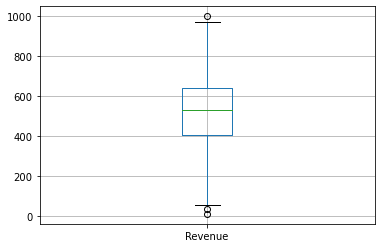

In [27]:
# Check the  outliers in Revenue  column
data_df.boxplot('Revenue')

In [28]:
# treat the outliers for Revenue
q1_rev = data_df['Revenue'].describe()[4]
q3_rev = data_df['Revenue'].describe()[6]
IQR_rev = q3_rev - q1_rev
IQR_rev

236.699240475

In [29]:
# calculate upperwhisker
upperwhisker_rev = (q3_rev + (1.5*IQR_rev)).astype(int)
upperwhisker_rev


997

In [30]:
# calculate lowerwhisker
lowerwhisker_rev = (q1_rev - (1.5*IQR_rev)).astype(int)
lowerwhisker_rev

50

In [31]:
# identify all the outliers in Revenue column
data_df[data_df['Revenue'] > upperwhisker_rev]['Revenue']

444    1000.0
Name: Revenue, dtype: float64

In [32]:
out_rev = len (data_df[data_df['Revenue'] > upperwhisker_rev]['Revenue'])
out_rev

1

In [33]:
#If percent is more than 0.3% we need to handle the outlier
percent_rev = round((out_rev/data_df.shape[0])*100 , 2)
percent_rev
# Inference :  If percent is more than 0.3% we need to handle the outlier . In this case its 0.2 % so we can leave the outlier

0.2

In [34]:
data_df[data_df['Revenue'] < lowerwhisker_rev]['Revenue']

371    32.546619
402    10.000000
Name: Revenue, dtype: float64

In [35]:
out_rev_l = len (data_df[data_df['Revenue'] < lowerwhisker_rev]['Revenue'])
out_rev_l

2

In [36]:
percent_rev_l = round((out_rev_l/data_df.shape[0])*100 , 2)
percent_rev_l
# Inference :  If percent is more than 0.3% we need to handle the outlier . In this case its 0.4 % so need to handle the outlier

0.4

In [37]:
# Handle the outlier
data_df['Revenue'] = np.where(data_df['Revenue'] < lowerwhisker_rev , lowerwhisker_rev , data_df['Revenue'] )

<AxesSubplot:>

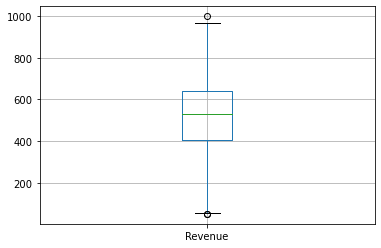

In [38]:
# Check if the outlier is handled
data_df.boxplot('Revenue')

In [39]:
data_df.iloc[371 , :]

Temperature     1.0
Revenue        50.0
Name: 371, dtype: float64

In [40]:
data_df[data_df['Revenue'] < lowerwhisker_rev]['Revenue']
# Inference :  The outliers are handled 

Series([], Name: Revenue, dtype: float64)

# Applying Decision Tree - Model 1  with Test 20% and depth 3


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x= data_df['Temperature'].values
y= data_df['Revenue'].values

In [43]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1) 

In [44]:
#import DT regressor model 
from sklearn.tree import DecisionTreeRegressor

# create an instance of DT model
DTR = DecisionTreeRegressor(max_depth=3)

In [45]:
# Fit the model after reshaping the train and test data

x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


DTR.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [46]:
#Predicting the Results
y_predict = DTR.predict(x_test)

In [47]:
# Printing the tested and predicted values
print_df = pd.DataFrame({'Actual Test Values' : y_test.reshape(-1) , 'Predicted Values' : y_predict.reshape(-1)})
print_df

,Actual Test Values,Predicted Values
0,714.560056,638.526043
1,579.307388,638.526043
2,651.861536,638.526043
3,284.772789,290.007771
4,432.819795,404.676637
...,...,...
95,71.160153,167.017246
96,499.458343,475.800485
97,543.599593,548.753628
98,472.549343,404.676637


In [48]:
# Checking score of training and testting
print ("DTR train score with model 1  is :" ,DTR.score(x_train,y_train))
print ("\n DTR test score with model 1 is :" ,DTR.score(x_test,y_test))



DTR train score with model 1  is : 0.9565807455764773

 DTR test score with model 1 is : 0.9392140816004821


# Applying Decision Tree - Model 2  with Test 30%  and depth 3

In [49]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1) 
DTR = DecisionTreeRegressor(max_depth=3)

In [50]:
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


DTR.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [51]:
#Predicting the Results
y_predict = DTR.predict(x_test)

In [52]:
# Printing the tested and predicted values
print_df = pd.DataFrame({'Actual Test Values' : y_test.reshape(-1) , 'Predicted Values' : y_predict.reshape(-1)})
print_df

,Actual Test Values,Predicted Values
0,714.560056,643.614998
1,579.307388,560.113379
2,651.861536,643.614998
3,284.772789,296.362026
4,432.819795,408.013138
...,...,...
145,678.751388,643.614998
146,715.124695,754.186986
147,212.591740,296.362026
148,655.433979,643.614998


In [53]:

# Checking score of training and testting
print ("DTR train score with model 2  is :" ,DTR.score(x_train,y_train))
print ("\n DTR test score with model 2 is :" ,DTR.score(x_test,y_test))

# Both the scores are near so  model 2 is generalised

DTR train score with model 2  is : 0.9572632405022123

 DTR test score with model 2 is : 0.9439609049466868


# Applying Decision Tree - Model 3  with Test 30% and depth 5

In [54]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1) 
DTR = DecisionTreeRegressor(max_depth=5)

In [55]:
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


DTR.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [56]:
#Predicting the Results
y_predict = DTR.predict(x_test)

In [72]:
# Printing the tested and predicted values
print_df = pd.DataFrame({'Actual Test Values' : y_test.reshape(-1) , 'Predicted Test Values' : y_predict.reshape(-1)})
print_df

,Actual Test Values,Predicted Test Values
0,714.560056,689.900782
1,579.307388,594.633338
2,651.861536,689.900782
3,284.772789,306.113008
4,432.819795,421.183946
...,...,...
145,678.751388,654.490072
146,715.124695,719.740004
147,212.591740,243.785017
148,655.433979,640.832292


In [73]:
# Checking score of training and testting f
print ("DTR train score with model 3  is :" ,DTR.score(x_train,y_train))
print ("\n DTR test score with model 3 is :" ,DTR.score(x_test,y_test))

# Both the scores are  high and quiet close so  model 3 is the best generalised model

DTR train score with model 3  is : 0.983873233646135

 DTR test score with model 3 is : 0.9742409524019874


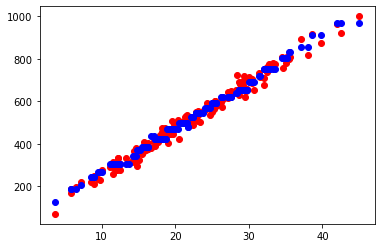

In [74]:
#Visualise the DT regression result
from matplotlib import pyplot as plt

plt.scatter(x_test,y_test, color='red')
plt.scatter(x_test,y_predict, color='blue')

plt.show()

In [ ]:
# With Model 1 : we have a score of 95.6% 
# With Model 2 we have a score of 95.7% 
# With Model 3 we have a score of 98.3% 

# All the models are performing well as train and test scores are similar and high in each model

#Conclusion :

# Model 3 is the  better model and we can say we will predict the revenue based on a temperature with a accuracy score of 98.3% 

In [77]:
rev= DTR.predict([[40]])
rev

array([912.64539152])